In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from google.colab import files

# Data Preprocessing
In a first step we generate the train, validation, and test datasets from the available data. We will combine different datasets, remove duplicates and perform a train-validation-split.

## 1.Germeval
We start with the Germeval datasets. We will generate three different train-validation-test sets. One containing only the Germeval 2018 data, one containing only the Germeval 2019 data, and a third one containing both, the Germeval 2018 and the Germeval 2019 data.

In [ ]:
files.upload()

Saving germeval_19_test.csv to germeval_19_test.csv
Saving germeval_19_train.csv to germeval_19_train.csv
Saving germeval_19_valid.csv to germeval_19_valid.csv


{'germeval_19_test.csv': b'text\tlabel1\tlabel2\tlabel\n@JanZimmHHB @mopo Komisch das die Realit\xc3\xa4tsverweigerung immer von linken erb\xc3\xa4rmlichen Correctiv Accounts ausgeht...\tOFFENSE\tINSULT\t1\n@faznet @Gruene_Europa @SPDEuropa @CDU CDU steht seid Strauss, Kohl, Sch\xc3\xa4uble, vdLeyen f\xc3\xbcr Korruption, Schwarzgeld, und dies \xc3\xbcberall...\tOFFENSE\tABUSE\t1\n@DLFNachrichten Die Gesichter, Namen, Religion der T\xc3\xa4ter w\xc3\xbcrde zur Aufkl\xc3\xa4rung beitragen...\tOTHER\tOTHER\t0\n@welt Wie verwirrt muss man sein um sich zu weigern die Tatsachen anzuerkennen, das dieser Hass von Ferkel importiert wurde....was bezweckt man damit sich selber so zu bel\xc3\xbcgen, unverst\xc3\xa4ndlich\tOFFENSE\tABUSE\t1\n@hacker_1991 @torben_braga Weil die AfD den Ferkelfunk abschaffen will, deshalb haben die Linken Zecken, Schmarotzer Angst f\xc3\xbcr ihr kacken arbeiten zu m\xc3\xbcssen, deshalb sind die F\xc3\xbchrer treu und senden jeden Dreck, L\xc3\xbcge...\tOFFENSE\tABU

First let us load the datasets into pandas dataframes.

In [ ]:
df_18_train = pd.read_csv('./germeval2018.training.txt', encoding="utf-8", sep="\t", names=['text','label1','label2'])
df_18_test = pd.read_csv('./germeval2018.test.txt', encoding="utf-8", sep="\t", names=['text','label1','label2'])

df_19_train_task_12 = pd.read_csv('./germeval2019.training_subtask1_2_korrigiert.txt', encoding="utf-8", sep="\t", names=['text','label1','label2'])
df_19_train_task_3 = pd.read_csv('./germeval2019.training_subtask3.txt', encoding="utf-8", sep="\t", names=['text','label1','label2','label3'])
df_19_train_task_3 = df_19_train_task_3.drop(columns=['label3'])

df_19_test_task_12 = pd.read_csv('./germeval2019GoldLabelsSubtask1_2.txt', encoding="utf-8", sep="\t", names=['text','label1','label2'])
df_19_test_task_3 = pd.read_csv('./germeval2019GoldLabelsSubtask3.txt', encoding="utf-8", sep="\t", names=['text','label1','label2','label3'])
df_19_test_task_3 = df_19_test_task_3.drop(columns=['label3'])

df_19_train_task_3.head()

text   label1     label2
0  @spdde kein verläßlicher Verhandlungspartner. ...  OFFENSE     INSULT
1  @milenahanm 33 bis 45 habe ich noch gar nicht ...  OFFENSE  PROFANITY
2  @tagesschau Euere AfD Hetze wirkt. Da könnt ih...  OFFENSE      ABUSE
3  Deutsche Medien, Halbwahrheiten und einseitige...  OFFENSE      ABUSE
4  @Ralf_Stegner Oman Ralle..dich mag ja immer no...  OFFENSE     INSULT

In [ ]:
df_18_train.drop_duplicates(subset=['text'],keep='last', inplace=True)

In [ ]:
df_19_train = pd.concat([df_19_train_task_12, df_19_train_task_3])
df_19_test = pd.concat([df_19_test_task_12, df_19_test_task_3])

df_19_train.drop_duplicates(subset=['text'],keep='last', inplace=True)
df_19_test.drop_duplicates(subset=['text'],keep='last', inplace=True)

In [ ]:
df_1819_train = pd.concat([df_18_train, df_18_test, df_19_train])
df_1819_train.drop_duplicates(subset=['text'], keep='last', inplace=True)

Perform the train-validation split for the Germeval 2018 data and save the result

In [ ]:
df_18_train, df_18_valid = train_test_split(df_18_train, test_size=0.10, random_state=42, shuffle=True)
print(len(df_18_train),len(df_18_valid),len(df_18_test))

4508 501 3398


In [ ]:
df_18_train.to_csv('./germeval_18_train.csv', index=False, sep="\t", encoding="utf-8")
df_18_valid.to_csv('./germeval_18_valid.csv', index=False, sep="\t", encoding="utf-8")
df_18_test.to_csv('./germeval_18_test.csv', index=False, sep="\t", encoding="utf-8")

Now the same for the Germeval 2019 data

In [ ]:
df_19_train, df_19_valid = train_test_split(df_19_train, test_size=0.10, random_state=42, shuffle=True)
print(len(df_19_train),len(df_19_valid),len(df_19_test))

5310 591 3961


In [ ]:
df_19_train.to_csv('./germeval_19_train.csv', index=False, sep="\t", encoding="utf-8")
df_19_valid.to_csv('./germeval_19_valid.csv', index=False, sep="\t", encoding="utf-8")
df_19_test.to_csv('./germeval_19_test.csv', index=False, sep="\t", encoding="utf-8")

And a third time for the combined data. Here we use only the Germeval 2019 test data as the test set

In [ ]:
df_1819_train, df_1819_valid = train_test_split(df_1819_train, test_size=0.10, random_state=42, shuffle=True)
print(len(df_1819_train),len(df_1819_valid),len(df_19_test))

11168 1241 3961


In [ ]:
df_19_train.to_csv('./germeval_1819_train.csv', index=False, sep="\t", encoding="utf-8")
df_19_valid.to_csv('./germeval_1819_valid.csv', index=False, sep="\t", encoding="utf-8")
df_19_test.to_csv('./germeval_1819_test.csv', index=False, sep="\t", encoding="utf-8")

## 2. Covid-19 Dataset

In [ ]:
files.upload()

Saving covid_2021_test.csv to covid_2021_test.csv
Saving covid_2021_training.csv to covid_2021_training.csv
Saving covid_2021_validation.csv to covid_2021_validation.csv


{'covid_2021_test.csv': b'id\ttext\tauthor_id\tlabel\tAID1\tAID2\tAID3\n1338326350860529664\t"Die gro\xc3\x9fe Selbstzerst\xc3\xb6rung https://t.co/dyU9NW5tHG via @YouTube\n\nLiebe Intellektuelle: wo seid ihr gerade? Ihr sonst so mutigen Kritiker, Nachtarbeiter, Salonprovokateure und Geisteselite. Habt ihr euch freiwillig in intellektuelle Quarant\xc3\xa4ne begeben?"\t1907273437\tabusive\tabusive\tnan\tnan\n1229328927870640128\t"@Nachtbuechlein Die haben alle nicht diese extrem lange Inkubationszeit und vor allem waren die nicht auf so vielen Wegen \xc3\xbcbertragbar\n\nIm Moment wird wohl untersucht, ob es einen Grund gibt, dass bisher offenbar nur Asiaten daran verstarben"\t636912037\tnot\tnot\tnan\tnan\n1275831801899028482\t@TeamKenFM Wer sch\xc3\xbctzt uns eigentlich vor dumm schwetzern wie dir?\t1051921765268680704\tabusive\tabusive\tnan\tnan\n1238124693623693313\t@Franzis36187916 Eins verstehe ich nicht...bei uns in Bosnien hat ein Video aus Wuhan runde https://t.co/CcGc88shLC ze

In [ ]:
!pip3 install pickle5
import pickle5 as pickle

In [ ]:
with open("./dataset_with_annotations.pkl", "rb") as f:
  data = pickle.load(f)
  df_covid19 = pd.DataFrame(data=data)
df_covid19.head()

id  ... AID3
4232  1338326350860529664  ...  nan
211   1301185102509150208  ...  nan
4690  1229328927870640128  ...  nan
4401  1249374539982782480  ...  nan
712   1321824606525759488  ...  nan

[5 rows x 7 columns]

In [ ]:
dataset = "covid_2021"

df_covid19 = df_covid19.replace('\n',' ', regex=True)
df_covid19.to_csv(f"./{dataset}_dataset.csv", sep="\t", encoding="utf-8", index=False)

ids =  list(set(df_covid19['author_id'].to_list()))
random.shuffle(ids)
pos_1 = int(len(ids)*0.7)
pos_2 = int(len(ids)*0.85)

len_1 = len(df_covid19[df_covid19['author_id'].isin(ids[0:pos_1])])
len_2 = len(df_covid19[df_covid19['author_id'].isin(ids[pos_1:pos_2])])
len_3 = len(df_covid19[df_covid19['author_id'].isin(ids[pos_2:])])

print(len_1)
print(len_2)
print(len_3)
print(len_1+len_2+len_3)
print(len(df_covid19))

df_covid19_train = df_covid19[df_covid19['author_id'].isin(ids[0:pos_1])]
df_covid19_valid = df[df['author_id'].isin(ids[pos_1:pos_2])]
df_covid_19_test = df[df['author_id'].isin(ids[pos_2:])]
df_covid19_train.to_csv(f"./{dataset}_training.csv",sep="\t",index=False)
df_covid19_valid.to_csv(f"./{dataset}_validation.csv",sep="\t",index=False)
df_covid_19_test.to_csv(f"./{dataset}_test.csv",sep="\t",index=False)

3532
730
698
4960
4960


# 3. Hasoc
We will use the Hasoc 2019 and the Hasoc 2020 data. We will generate two different training validation and test sets. The first one is based only on the Hasoc 2020 data, and the second one is a combination of both the Hasoc 2019 and the Hasco 2020 data.

In [3]:
files.upload()

Saving german_dev_1509.csv to german_dev_1509.csv
Saving german_test_1509.csv to german_test_1509.csv
Saving hasoc_2020_de_train_new.xlsx to hasoc_2020_de_train_new.xlsx


{'german_dev_1509.csv': b'tweet_id,text,task1,task2,ID\n1129095874242650112,@derCarsti Boykottieren h\xc3\xb6rt sich besser an. \xf0\x9f\x92\x99\xf0\x9f\x92\x99,NOT,NONE,hasoc_2020_de_1053\n1129004308396236800,"RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Br\xc3\xbcssel \xc3\xbcbernimmt.\nW\xc3\xa4re es so, wie sch\xc3\xa4tzen Sie dann die Zukunft der Mitgliedstaaten\xe2\x80\xa6",NOT,NONE,hasoc_2020_de_671\n1130896929355907080,Hat #Hitler wirklich den Krieg in der W\xc3\xbcste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.,NOT,NONE,hasoc_2020_de_2977\n1132251534329307136,"RT @Beatrix_vStorch: #May tritt in UK unter Tr\xc3\xa4nen zur\xc3\xbcck. Wenn #Merkel zur\xc3\xbccktritt, dann auch unter Tr\xc3\xa4nen \xe2\x80\x93 unter den Freudentr\xc3\xa4nen von M\xe2\x80\xa6",NOT,NONE,hasoc_2020_de_1746\n1124941869115498496,@justmeDoro Eher nicht. Das G\xc3\xa4nse hauen wieder ab in ihre warmen \xc3\x9cberwinterungsquartiere. \xf0\x9f\x98\x85\xf0\x9f\x98\x82,

In [4]:
df_2020_train = pd.read_excel('./hasoc_2020_de_train_new.xlsx', index_col=None)  
df_2020_valid = pd.read_csv('./german_dev_1509.csv', sep=",", encoding="utf-8")
df_2020_test = pd.read_csv('./german_test_1509.csv', sep=",", encoding="utf-8")
df_2020_train = df_2020_train.drop(columns=['tweet_id'])
df_2020_valid = df_2020_valid.drop(columns=['tweet_id'])
df_2020_test = df_2020_test.drop(columns=['tweet_id'])
df_2020_train = df_2020_train.rename(columns={'task1': "task_1",'task2': "task_2", 'ID': "text_id"})
df_2020_valid = df_2020_valid.rename(columns={'task1': "task_1",'task2': "task_2", 'ID': "text_id"})
df_2020_test = df_2020_test.rename(columns={'task1': "task_1",'task2': "task_2", 'ID': "text_id"})

df_2020_train.to_csv('./hasoc2020_german_train.tsv', index=False, sep="\t", encoding="utf-8")
df_2020_valid.to_csv('./hasoc2020_german_dev.tsv', index=False, sep="\t", encoding="utf-8")
df_2020_test.to_csv('./hasoc2020_german_test.tsv', index=False, sep="\t", encoding="utf-8")

In [7]:
df_2019_train = pd.read_csv('./german_dataset.tsv', sep="\t", encoding="utf-8")
df_2019_test = pd.read_csv('./hasoc_de_test_gold.tsv', sep="\t", encoding="utf-8")
df_1920_train = pd.concat([df_2020_train, df_2019_train, df_2019_test])

df_1920_train.to_csv('./hasoc19_20_german_train.tsv', index=False, sep="\t", encoding="utf-8")
df_2020_valid.to_csv('./hasoc19_20_german_dev.tsv', index=False, sep="\t", encoding="utf-8")
df_2020_test.to_csv('./hasoc19_20_german_test.tsv', index=False, sep="\t", encoding="utf-8")

# Some Statistics about the Datasets
We want to analyze the structure of the different datasets and plot them via barcharts.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_18_train = pd.read_csv('./germeval_18_train.csv', sep='\t', encoding="utf-8")
df_18_valid = pd.read_csv('./germeval_18_valid.csv', encoding="utf-8", sep="\t")
df_18_test = pd.read_csv('./germeval_18_test.csv', encoding="utf-8", sep="\t")

df_19_train = pd.read_csv('./germeval_19_train.csv', encoding="utf-8", sep="\t")
df_19_valid = pd.read_csv('./germeval_19_valid.csv', encoding="utf-8", sep="\t")
df_19_test = pd.read_csv('./germeval_19_test.csv', encoding="utf-8", sep="\t")

df_1819_train = pd.read_csv('./germeval_1819_train.csv', encoding="utf-8", sep="\t")
df_1819_valid = pd.read_csv('./germeval_1819_valid.csv', encoding="utf-8", sep="\t")
df_1819_test = pd.read_csv('./germeval_1819_test.csv', encoding="utf-8", sep="\t")

df_covid_train = pd.read_csv('./covid_2021_training.csv', sep='\t', encoding="utf-8")
df_covid_valid = pd.read_csv('./covid_2021_validation.csv', encoding="utf-8", sep="\t")
df_covid_test = pd.read_csv('./covid_2021_test.csv', encoding="utf-8", sep="\t")

df_hasoc_2020_train = pd.read_csv('./hasoc2020_german_train.tsv', sep='\t', encoding="utf-8")
df_hasoc_2020_valid = pd.read_csv('./hasoc2020_german_valid.tsv', encoding="utf-8", sep="\t")
df_hasoc_2020_test = pd.read_csv('./hasoc2020_german_test.tsv', encoding="utf-8", sep="\t")

df_hasoc_1920_train = pd.read_csv('./hasoc19_20_german_train.tsv', sep='\t', encoding="utf-8")
df_hasoc_1920_valid = pd.read_csv('./hasoc19_20_german_dev.tsv', encoding="utf-8", sep="\t")
df_hasoc_1920_test = pd.read_csv('./hasoc19_20_german_test.tsv', encoding="utf-8", sep="\t")

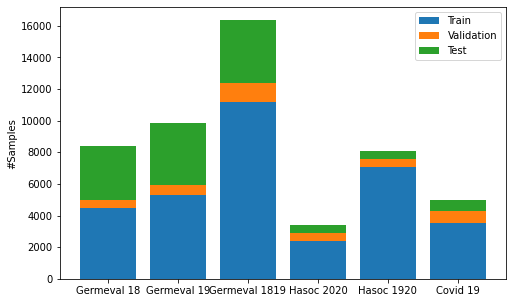

In [ ]:
labels = ['Germeval 18', 'Germeval 19', 'Germeval 1819', 'Hasoc 2020', 'Hasoc 1920', 'Covid 19']
trains = np.array([len(df_18_train), len(df_19_train), len(df_1819_train), len(df_hasoc_2020_train), len(df_hasoc_1920_train), len(df_covid_train)])
valids = np.array([len(df_18_valid), len(df_19_valid), len(df_1819_valid), len(df_hasoc_2020_valid), len(df_hasoc_1920_valid), len(df_covid_valid)])
tests = np.array([len(df_18_test), len(df_19_test), len(df_1819_test), len(df_hasoc_2020_test), len(df_hasoc_1920_test), len(df_covid_test)])
width = 0.8

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(labels, trains, width, label='Train')
ax.bar(labels, valids, width, bottom=trains, label='Validation')
ax.bar(labels, tests, width, bottom=(trains + valids), label='Test')

ax.set_ylabel('#Samples')
ax.legend()

plt.show()

In [ ]:
df_18 = pd.concat([df_18_train, df_18_valid, df_18_test])
df_19 = pd.concat([df_19_train, df_19_valid, df_19_test])
df_1819 = pd.concat([df_1819_train, df_1819_valid, df_1819_test])
df_covid = pd.concat([df_covid_train, df_covid_valid, df_covid_test])
df_hasoc_2020 = pd.concat([df_hasoc_2020_train, df_hasoc_2020_valid, df_hasoc_2020_test])
df_hasoc_1920 = pd.concat([df_hasoc_1920_train, df_hasoc_1920_valid, df_hasoc_1920_test])

In [ ]:
index, counts_18 = np.unique(df_18['label1'].values,return_counts=True)
print(index, counts_18)
index, counts_19 = np.unique(df_19['label1'].values,return_counts=True)
print(index, counts_19)
index, counts_1819 = np.unique(df_1819['label1'].values,return_counts=True)
print(index, counts_1819)
index, counts_covid = np.unique(df_covid['label'].values,return_counts=True)
print(index, counts_covid)
index, counts_hasoc_2020 = np.unique(df_hasoc_2020['task_1'].values,return_counts=True)
print(index, counts_hasoc_2020)
index, counts_hasoc_1920 = np.unique(df_hasoc_1920['task_1'].values,return_counts=True)
print(index, counts_hasoc_1920)

['OFFENSE' 'OTHER'] [2838 5569]
['OFFENSE' 'OTHER'] [5103 4759]
['OFFENSE' 'OTHER'] [ 6042 10328]
['abusive' 'not'] [1105 3855]
['HOF' 'NOT'] [ 940 2485]
['HOF' 'NOT'] [1483 6611]


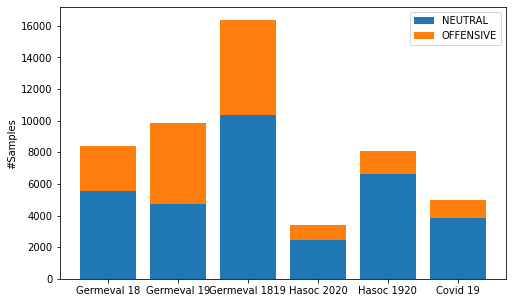

In [ ]:
offensive_counts = [counts_18[0], counts_19[0], counts_1819[0], counts_hasoc_2020[0], counts_hasoc_1920[0], counts_covid[0]]
other_counts = [counts_18[1], counts_19[1], counts_1819[1], counts_hasoc_2020[1], counts_hasoc_1920[1], counts_covid[1]]

labels = ['Germeval 18', 'Germeval 19', 'Germeval 1819', 'Hasoc 2020', 'Hasoc 1920', 'Covid 19']
width = 0.8

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(labels, other_counts, width, label='NEUTRAL')
ax.bar(labels, offensive_counts, width, bottom=other_counts, label='OFFENSIVE')

ax.set_ylabel('#Samples')
ax.legend()

plt.show()

In [ ]:
index, counts_18 = np.unique(df_18['label2'].values,return_counts=True)
print(index, counts_18)
index, counts_19 = np.unique(df_19['label2'].values,return_counts=True)
print(index, counts_19)
index, counts_1819 = np.unique(df_1819['label2'].values,return_counts=True)
print(index, counts_1819)

['ABUSE' 'INSULT' 'OTHER' 'PROFANITY'] [1759  963 5569  116]
['ABUSE' 'INSULT' 'OTHER' 'PROFANITY'] [2673 2049 4759  381]
['ABUSE' 'INSULT' 'OTHER' 'PROFANITY'] [ 3269  2362 10328   411]


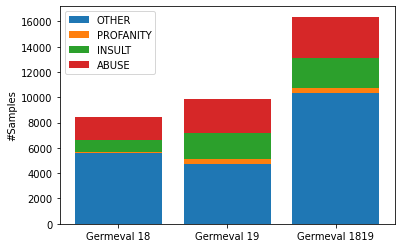

In [ ]:
abuse_counts = np.array([counts_18[0], counts_19[0], counts_1819[0]])
insult_counts = np.array([counts_18[1], counts_19[1], counts_1819[1]])
other_counts = np.array([counts_18[2], counts_19[2], counts_1819[2]])
profanity_counts = np.array([counts_18[3], counts_19[3], counts_1819[3]])

labels = ['Germeval 18', 'Germeval 19', 'Germeval 1819']
width = 0.8

fig, ax = plt.subplots()

ax.bar(labels, other_counts, width, label='OTHER')
ax.bar(labels, profanity_counts, width, bottom=other_counts, label='PROFANITY')
ax.bar(labels, insult_counts, width, bottom=(other_counts + profanity_counts), label='INSULT')
ax.bar(labels, abuse_counts, width, bottom=(other_counts + profanity_counts + insult_counts), label='ABUSE')

ax.set_ylabel('#Samples')
ax.legend()

plt.show()

In [ ]:
index, counts_hasoc_2020 = np.unique(df_hasoc_2020['task_2'].values,return_counts=True)
print(index, counts_hasoc_2020)
index, counts_hasoc_1920 = np.unique(df_hasoc_1920['task_2'].values,return_counts=True)
print(index, counts_hasoc_1920)

['HATE' 'NONE' 'OFFN' 'PRFN'] [ 203 2452  206  564]
['HATE' 'NONE' 'OFFN' 'PRFN'] [ 355 6578  493  668]


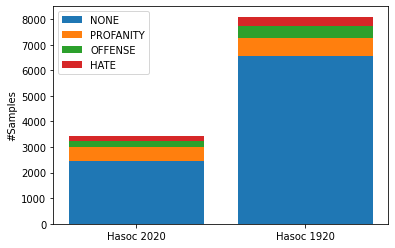

In [ ]:
hate_counts = np.array([counts_hasoc_2020[0], counts_hasoc_1920[0]])
none_counts = np.array([counts_hasoc_2020[1], counts_hasoc_1920[1]])
offense_counts = np.array([counts_hasoc_2020[2], counts_hasoc_1920[2]])
profanity_counts = np.array([counts_hasoc_2020[3], counts_hasoc_1920[3]])

labels = ['Hasoc 2020', 'Hasoc 1920']
width = 0.8

fig, ax = plt.subplots()

ax.bar(labels, none_counts, width, label='NONE')
ax.bar(labels, profanity_counts, width, bottom=none_counts, label='PROFANITY')
ax.bar(labels, offense_counts, width, bottom=(none_counts + profanity_counts), label='OFFENSE')
ax.bar(labels, hate_counts, width, bottom=(none_counts + profanity_counts + offense_counts), label='HATE')

ax.set_ylabel('#Samples')
ax.legend()

plt.show()